In [ ]:
!pip install download
from download import download

url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/cifar-10-binary.tar.gz"

download(url, "./datasets-cifar10-bin", kind="tar.gz", replace=True)


Creating data folder...

file_sizes: 100%|████████████████████████████| 170M/170M [00:21<00:00, 7.86MB/s]
Extracting tar.gz file...
Successfully downloaded / unzipped to ./datasets-cifar10-bin


'./datasets-cifar10-bin'

In [ ]:
import mindspore as ms
import mindspore.dataset as ds
import mindspore.dataset.vision as vision
import os
import mindspore.dataset.transforms as transforms
from mindspore import dtype as mstype

data_dir = "/content/datasets-cifar10-bin/cifar-10-batches-bin"  # Root directory of the dataset
batch_size = 256  # Batch size
image_size = 224  # Image size of training data
# workers = 4  # Number of parallel workers
num_classes = 10  # Number of classes


workers = min(8, os.cpu_count())
def create_dataset_cifar10(dataset_dir, usage, resize, batch_size, workers):

    data_set = ds.Cifar10Dataset(dataset_dir=dataset_dir,
                                 usage=usage,
                                 num_parallel_workers=num_workers,
                                 shuffle=True)

    trans = []
    if usage == "train":
        trans += [
            vision.RandomCrop((32, 32), (4, 4, 4, 4)),
            vision.RandomHorizontalFlip(prob=0.5)
        ]

    trans += [
        vision.Resize(resize),
        vision.Rescale(1.0 / 255.0, 0.0),
        vision.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010]),
        vision.HWC2CHW()
    ]

    target_trans = transforms.TypeCast(mstype.int32)

    # Data transformation
    data_set = data_set.map(operations=trans,
                            input_columns='image',
                            num_parallel_workers=workers)

    data_set = data_set.map(operations=target_trans,
                            input_columns='label',
                            num_parallel_workers=workers)

    # Batching
    data_set = data_set.batch(batch_size)

    return data_set


# Obtain the preprocessed training and testing datasets

dataset_train = create_dataset_cifar10(dataset_dir=data_dir,
                                       usage="train",
                                       resize=image_size,
                                       batch_size=batch_size,
                                       workers=workers)
step_size_train = dataset_train.get_dataset_size()

dataset_val = create_dataset_cifar10(dataset_dir=data_dir,
                                     usage="test",
                                     resize=image_size,
                                     batch_size=batch_size,
                                     workers=workers)
step_size_val = dataset_val.get_dataset_size()


In [ ]:
dataset_train.get_dataset_size()

196

In [ ]:
dataset_val.get_dataset_size()

40

In [ ]:
import numpy as np

# Assuming 'dataset_train' is your training dataset
data_iter = next(dataset_train.create_dict_iterator())
labels = data_iter["label"].asnumpy()

# Count occurrences of each class
class_counts = np.bincount(labels, minlength=num_classes)

# Print the number of images per class
for i, count in enumerate(class_counts):
    print(f"Class {i}: {count} images")

Class 0: 29 images
Class 1: 30 images
Class 2: 27 images
Class 3: 23 images
Class 4: 18 images
Class 5: 31 images
Class 6: 30 images
Class 7: 24 images
Class 8: 22 images
Class 9: 22 images


Image shape: (256, 3, 224, 224), Label shape: (256,)
Labels: [4 2 7 2 8 9]


<Figure size 640x480 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'deer')

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

<Axes: >

Text(0.5, 1.0, 'bird')

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

<Axes: >

Text(0.5, 1.0, 'horse')

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

<Axes: >

Text(0.5, 1.0, 'bird')

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

<Axes: >

Text(0.5, 1.0, 'ship')

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

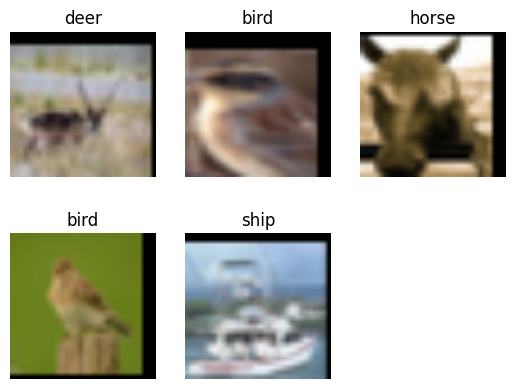

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data_iter = next(dataset_train.create_dict_iterator())

images = data_iter["image"].asnumpy()
labels = data_iter["label"].asnumpy()
print(f"Image shape: {images.shape}, Label shape: {labels.shape}")

# The labels for the first six pictures in the training dataset
print(f"Labels: {labels[:6]}")

classes = []

with open(data_dir + "/batches.meta.txt", "r") as f:
    for line in f:
        line = line.rstrip()
        if line:
            classes.append(line)

# First six pictures in the training dataset
plt.figure()
for i in range(5):
    plt.subplot(2, 3, i + 1)
    image_trans = np.transpose(images[i], (1, 2, 0))
    mean = np.array([0.4914, 0.4822, 0.4465])
    std = np.array([0.2023, 0.1994, 0.2010])
    image_trans = std * image_trans + mean
    image_trans = np.clip(image_trans, 0, 1)
    plt.title(f"{classes[labels[i]]}")
    plt.imshow(image_trans)
    plt.axis("off")
plt.show()
